In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx

In [63]:
def encontrar_isoterma(archivo ,n ,m ,ri ,re):
    
    #asumir que queda en un array 'b' es de (n*m) * 1
    #lo pasamos a A de n*m
    b=np.loadtxt(archivo)
    b.resize(n,m)
    A=b.transpose()
    isotermas=[]
    for a in A:
            
        elem, rad_nivel = find_nearest(a,500)
        radio_nearest=rad_nivel*((re-ri)/(m-1))
            ##elem --- radio_nearest
            ##500 -- x
        punto_isoterma=(radio_nearest*500)/elem
        isotermas.append(punto_isoterma)
        
    return isotermas
        
        
        
        

# Experimentos
Leemos el dataframe con todos los resultados.

In [2]:
df_resultados = pd.read_csv("resultados_instancias/resultado.csv");
df_resultados

,dataset,metodo,n,m,nist,tiempo
0,angulos_variables,LU,6,10,1,0.003921
1,angulos_variables,LU,8,10,1,0.009416
2,angulos_variables,LU,10,10,1,0.012839
3,angulos_variables,LU,12,10,1,0.020127
4,angulos_variables,LU,14,10,1,0.042560
...,...,...,...,...,...,...
201,gauss-lu,GAUSS,54,54,1,91.205400
202,gauss-lu,LU,56,56,1,113.170000
203,gauss-lu,GAUSS,56,56,1,111.577000
204,gauss-lu,LU,58,58,1,137.524000


## Experimento 1: Análisis de GAUSS vs LU con muchos nist

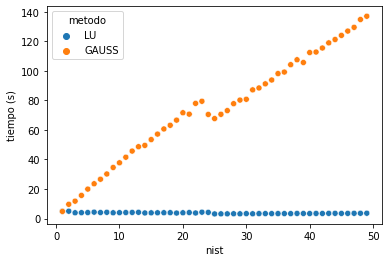

In [3]:
df_muchos_nist = df_resultados[((df_resultados["metodo"]=="GAUSS") | (df_resultados["metodo"]=="LU")) & (df_resultados["dataset"] == "muchos_nist")].copy();
fig = sns.scatterplot(data=df_muchos_nist, x='nist', y='tiempo', hue='metodo');
fig.set(xlabel='nist', ylabel='tiempo (s)');
plt.savefig("graficos/muchos_nist.svg");

## Experimento 2: Análisis de GAUSS vs LU con incrementando n

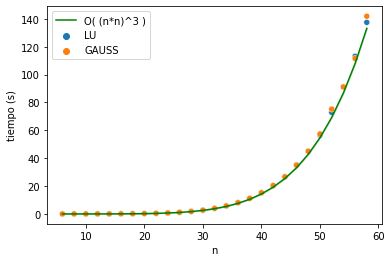

In [4]:
df_gauss_lu = df_resultados[((df_resultados["metodo"]=="GAUSS") | (df_resultados["metodo"]=="LU")) & (df_resultados["dataset"] == "gauss-lu")].copy();
df_gauss_lu["tiempo_esperado"] = (df_gauss_lu["n"] ** 6) * 0.0000000035;
fig = sns.scatterplot(data=df_gauss_lu, x='n', y='tiempo', hue='metodo');
fig = sns.lineplot(data=df_gauss_lu, x='n', y='tiempo_esperado', color="green",label='O( (n*n)^3 )');
fig.set(xlabel='n', ylabel='tiempo (s)');
plt.savefig("graficos/gauss-lu.svg");

## Isotermas

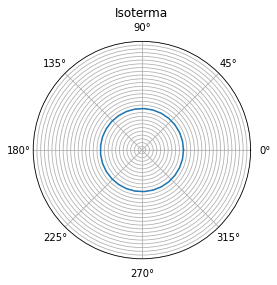

In [113]:
n=30
m=30
ri=10
re=100

r = encontrar_isoterma('../tests/tests_alu/test1.expected',n,m,ri,re)
cantidad_puntos = n
theta = np.linspace(0, 2*np.pi, cantidad_puntos)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rticks([((re-ri)/(m))*x for x in range(m)])
plt.yticks([((re-ri)/(m))*x for x in range(m)], [])
ax.grid(True)
ax.set_title("Isoterma")
plt.show()



/tmp/ipykernel_13669/3227240515.py:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  grafico = ax.pcolor(theta, r,z, cmap='jet')


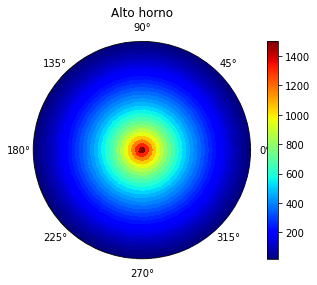

In [118]:
n=30
m=30
ri=10
re=100
archivo='../tests/tests_alu/test1.expected'
b = encontrar_isoterma(archivo,n,m,ri,re)


cantidad_angulos = n
cantidad_radios = m

theta = np.tile(np.linspace(0, 2*np.pi, cantidad_angulos), (cantidad_radios, 1)).transpose()

r = np.tile(np.linspace(0, 1, cantidad_radios), (cantidad_angulos, 1))

b=np.loadtxt(archivo)
b.resize(n,m)
z=b.transpose()


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
grafico = ax.pcolor(theta, r,z, cmap='jet')
ax.set_title('Alto horno')
ax.set_yticklabels([])
fig.colorbar(grafico)
plt.show()